In [1]:
import dynpssimpy.dynamic as dps
import dynpssimpy.modal_analysis as dps_mdl
import dynpssimpy.plotting as dps_plt
import numpy as np
import matplotlib.pyplot as plt
import json
from sparculing.helper_functions import *
from sparculing.gen_sens import *

In [2]:
with open('k2a.json') as f:
    data= f.read()

In [3]:
model = json.loads(data)

In [4]:
pl0=get_load_power_vector(model)

In [5]:
pg0=get_gen_power_vector(model)

In [6]:
np.sum(pl0)

2734

In [7]:
pl0

array([ 967, 1767])

In [8]:
np.sum(pg0)

2819

In [9]:
pg0

array([700, 700, 719, 700])

In [10]:
change_all_load_powers(model, pl0+[-100,100])

In [11]:
change_all_gen_powers(model, pg0+[100,0,0,-100])

In [12]:
sys=dps.PowerSystemModel(model=model)

Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN


In [13]:
sys.init_dyn_sim()
ps_lin = dps_mdl.PowerSystemModelLinearization(sys)
ps_lin.linearize()
ps_lin.eigenvalue_decomposition()

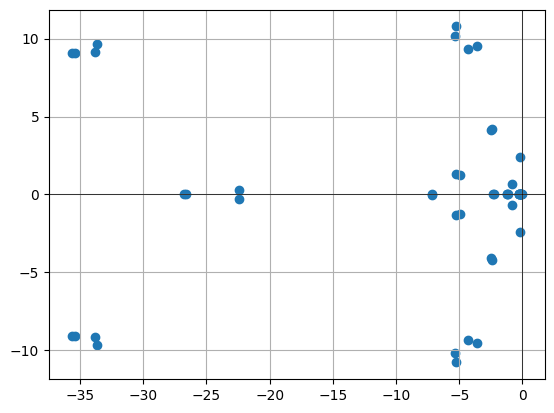

In [14]:
dps_plt.plot_eigs(ps_lin.eigs)

In [15]:
remove_inaccurate_zero(ps_lin)

In [16]:
np.argmin(ps_lin.damping)

30

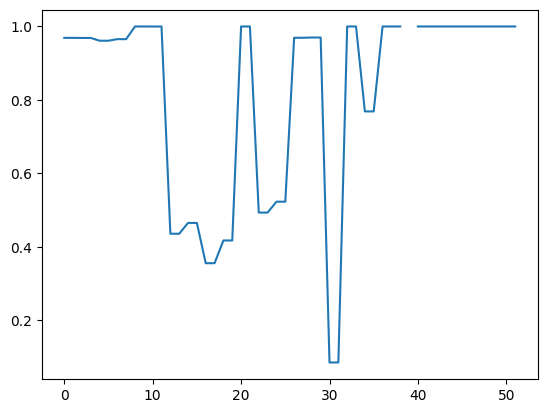

In [17]:
plt.plot(ps_lin.damping)

In [18]:
np.min(ps_lin.damping)

0.08506433843531326

In [19]:
senser = GenSensDispatchUnconstrained(model)

Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Sta

In [20]:
np.shape(senser.gen_sens)

(52, 4)

In [21]:
genser=senser.get_gen_sens(dP=1e-6)

Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Sta

In [22]:
genser2=senser.get_gen_sens(dP=1e-5)
genser3=senser.get_gen_sens(dP=1e-4)
genser4=senser.get_gen_sens(dP=1e-3)
genser5=senser.get_gen_sens(dP=1e-2)

Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN
Standard model: lines, Line
Standard model: loads, Load
Standard model: shunts, Shunt
Standard model: gov, TGOV1
Sta

AssertionError: 

In [23]:
np.sum(genser2-genser)

(24.706589232314776+0j)

In [24]:
np.sum(genser3-genser2)

(2.4706589232314777+0j)

In [25]:
np.sum(genser5-genser2)

NameError: name 'genser5' is not defined

In [ ]:
from copy import deepcopy

In [ ]:
copy(senser.model)

In [ ]:
jac = senser._make_jacobian(senser.zeta+0.01)

In [ ]:
jac

In [ ]:
np.linalg.solve(-jac, f)

In [ ]:
test=senser.get_gen_sens(dP=0.05)

In [ ]:
np.linalg.matrix_rank(jac)

In [ ]:
jac.shape

In [ ]:
jac[0,:]

In [ ]:
jac[1,:]

In [ ]:
senser.gen_sens[senser.min_mode, :]

In [ ]:
np.linalg.det(jac)

In [ ]:
senser.ps_lin_0.eigs[senser.min_mode]

In [ ]:
senser.ps_lin_0.damping[senser.min_mode]

In [ ]:
np.real(test[30,:])

In [ ]:
np.imag(test[30,:])

In [ ]:
(0.1/np.sqrt(1-0.01)*np.imag(test[30,:]))[1]-(0.1/np.sqrt(1-0.01)*np.imag(test[30,:]))[0]